In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
sns.set(style='whitegrid', palette='muted', font_scale=1.1)
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
import scipy.stats as stats
from statsmodels.formula.api import ols
import statsmodels.api as sm

In [2]:
df = pd.read_csv('data.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
missing = df.isnull().sum()
missing[missing>0].sort_values(ascending=False).head(5)

PoolQC         1453
MiscFeature    1406
Alley          1369
Fence          1179
MasVnrType      872
dtype: int64

In [4]:
num_cols = df.select_dtypes(include=['number']).columns
cat_cols = df.select_dtypes(include=['object']).columns

num_imputer = SimpleImputer(strategy='mean')
cat_imputer = SimpleImputer(strategy='most_frequent')

df[num_cols] = num_imputer.fit_transform(df[num_cols])
df[cat_cols] = cat_imputer.fit_transform(df[cat_cols])

In [5]:
df.head(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1.0,60.0,RL,65.0,8450.0,Pave,Grvl,Reg,Lvl,AllPub,...,0.0,Gd,MnPrv,Shed,0.0,2.0,2008.0,WD,Normal,208500.0
1,2.0,20.0,RL,80.0,9600.0,Pave,Grvl,Reg,Lvl,AllPub,...,0.0,Gd,MnPrv,Shed,0.0,5.0,2007.0,WD,Normal,181500.0
2,3.0,60.0,RL,68.0,11250.0,Pave,Grvl,IR1,Lvl,AllPub,...,0.0,Gd,MnPrv,Shed,0.0,9.0,2008.0,WD,Normal,223500.0


In [27]:
print('Total Rows:', df.shape[0])
print('Total Columns:', df.shape[1])

Total Rows: 1460
Total Columns: 81


In [28]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,22.024023,9981.264932,1.382997,1.112799,30.202904,20.645407,180.569112,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,60.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,70.049958,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,79.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,164.250000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [103]:
df.median(numeric_only=True).head(5)

Id              730.500000
MSSubClass       50.000000
LotFrontage      70.049958
LotArea        9478.500000
OverallQual       6.000000
dtype: float64

In [104]:
df.skew(numeric_only=True).sort_values(ascending=False).head(5)

MiscVal         24.476794
PoolArea        14.828374
LotArea         12.207688
3SsnPorch       10.304342
LowQualFinSF     9.011341
dtype: float64

In [105]:
df.kurtosis(numeric_only=True).sort_values(ascending=False).head(5)

MiscVal         701.003342
PoolArea        223.268499
LotArea         203.243271
3SsnPorch       123.662379
LowQualFinSF     83.234817
dtype: float64

In [85]:
df.isnull().sum().sort_values(ascending=False)

Id              0
KitchenQual     0
GarageCars      0
GarageFinish    0
GarageYrBlt     0
               ..
MasVnrArea      0
MasVnrType      0
Exterior2nd     0
Exterior1st     0
house_age       0
Length: 84, dtype: int64

In [86]:
df['SalePrice'].max() - df['SalePrice'].min()

720100.0

In [106]:
saleprice = df['SalePrice'].dropna()
if len(saleprice) > 5000:
    print("Warning: Shapiro-Wilk test may not be reliable for samples > 5000. Consider subsampling.")

# Run Shapiro-Wilk test
stat, p_value = stats.shapiro(saleprice)

print(f"Shapiro-Wilk Test statistic: {stat:.4f}")
print(f"P-value: {p_value:.4g}")

if p_value > 0.05:
    print("Fail to reject null hypothesis: Data looks normally distributed.")
else:
    print("Reject null hypothesis: Data does not look normally distributed.")

Shapiro-Wilk Test statistic: 0.8697
P-value: 3.206e-33
Reject null hypothesis: Data does not look normally distributed.


In [107]:
saleprice = df['SalePrice'].dropna()
saleprice_std = (saleprice - np.mean(saleprice)) / np.std(saleprice, ddof=1)
stat, p_value = stats.kstest(saleprice_std, 'norm')
print(f"KS test statistic: {stat:.4f}")
print(f"P-value: {p_value:.4g}")
if p_value > 0.05:
    print("Fail to reject null hypothesis: Data may be normally distributed.")
else:
    print("Reject null hypothesis: Data likely not normally distributed.")

KS test statistic: 0.1237
P-value: 6.33e-20
Reject null hypothesis: Data likely not normally distributed.


In [108]:
#One-way ANOVA: SalePrice by MSZoning
df_clean = df.dropna(subset=['SalePrice', 'MSZoning'])
anova_model = ols('SalePrice ~ C(MSZoning)', data=df_clean).fit()
anova_results = sm.stats.anova_lm(anova_model, typ=2)

print(anova_results)
p_val = anova_results['PR(>F)'][0]
if p_val < 0.05:
    print("There is a statistically significant difference in SalePrice between MSZoning categories.")
else:
    print("No statistically significant difference in SalePrice between MSZoning categories.")

                   sum_sq      df          F        PR(>F)
C(MSZoning)  9.904000e+11     4.0  43.840282  8.817634e-35
Residual     8.217511e+12  1455.0        NaN           NaN
There is a statistically significant difference in SalePrice between MSZoning categories.


In [109]:
df_clean = df.dropna(subset=['SalePrice', 'Neighborhood'])
anova2_model = ols('SalePrice ~ C(Neighborhood)', data=df_clean).fit()
anova2_results = sm.stats.anova_lm(anova2_model, typ=2)
print(anova2_results)
p_val = anova2_results['PR(>F)'][0]
if p_val < 0.05:
    print("Statistically significant differences in SalePrice among Neighborhoods.")
else:
    print("No statistically significant differences in SalePrice among Neighborhoods.")

                       sum_sq      df          F         PR(>F)
C(Neighborhood)  5.023606e+12    24.0  71.784865  1.558600e-225
Residual         4.184305e+12  1435.0        NaN            NaN
Statistically significant differences in SalePrice among Neighborhoods.


In [110]:
#Chi-square: MSZoning vs Neighborhood
chi_table = pd.crosstab(df['MSZoning'], df['Neighborhood'])
chi2_stat, p_value, dof, expected = stats.chi2_contingency(chi_table)
print(f"Chi-square Statistic: {chi2_stat:.4f}")
print(f"Degrees of Freedom: {dof}")
print(f"P-value: {p_value:.4g}")
if p_value < 0.05:
    print("There is a significant association between MSZoning and Neighborhood.")
else:
    print("No significant association between MSZoning and Neighborhood.")

Chi-square Statistic: 2486.2640
Degrees of Freedom: 96
P-value: 0
There is a significant association between MSZoning and Neighborhood.


In [97]:
df['SalePrice_z'] = stats.zscore(df['SalePrice'])
df[['SalePrice', 'SalePrice_z']].head()

,SalePrice,SalePrice_z
0,208500.0,0.347273
1,181500.0,0.007288
2,223500.0,0.536154
3,140000.0,-0.515281
4,250000.0,0.869843


In [98]:
outliers = df[np.abs(df['SalePrice_z']) > 3]
len(outliers)

22

In [111]:
Q1 = df['SalePrice'].quantile(0.25)
Q3 = df['SalePrice'].quantile(0.75)
IQR = Q3 - Q1

outliers_condition = (df['SalePrice'] < (Q1 - 1.5 * IQR)) | (df['SalePrice'] > (Q3 + 1.5 * IQR))
num_outliers = outliers_condition.sum()
print(f"Number of outliers in SalePrice: {num_outliers}")

Number of outliers in SalePrice: 61


In [112]:
clean_data = df[['SalePrice', 'YearBuilt']].dropna()
corr_coef, p_value = stats.pearsonr(clean_data['SalePrice'], clean_data['YearBuilt'])
print(f"Pearson correlation coefficient: {corr_coef:.4f}")
print(f"P-value: {p_value:.4g}")
if p_value < 0.05:
    print("Correlation is statistically significant.")
else:
    print("Correlation is not statistically significant.")

Pearson correlation coefficient: 0.5229
P-value: 2.99e-103
Correlation is statistically significant.


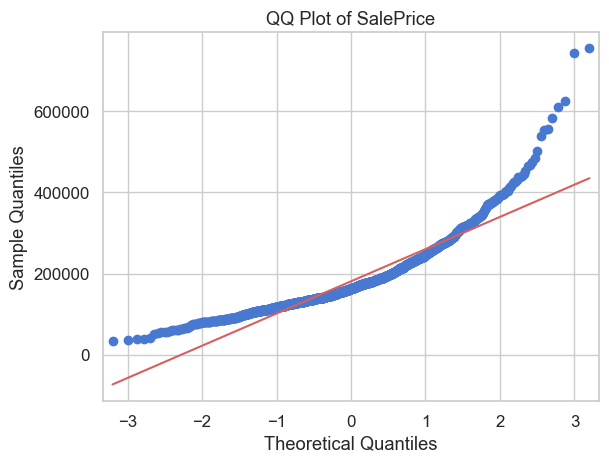

In [113]:
sm.qqplot(df['SalePrice'], line='s')
plt.title('QQ Plot of SalePrice')
plt.show()

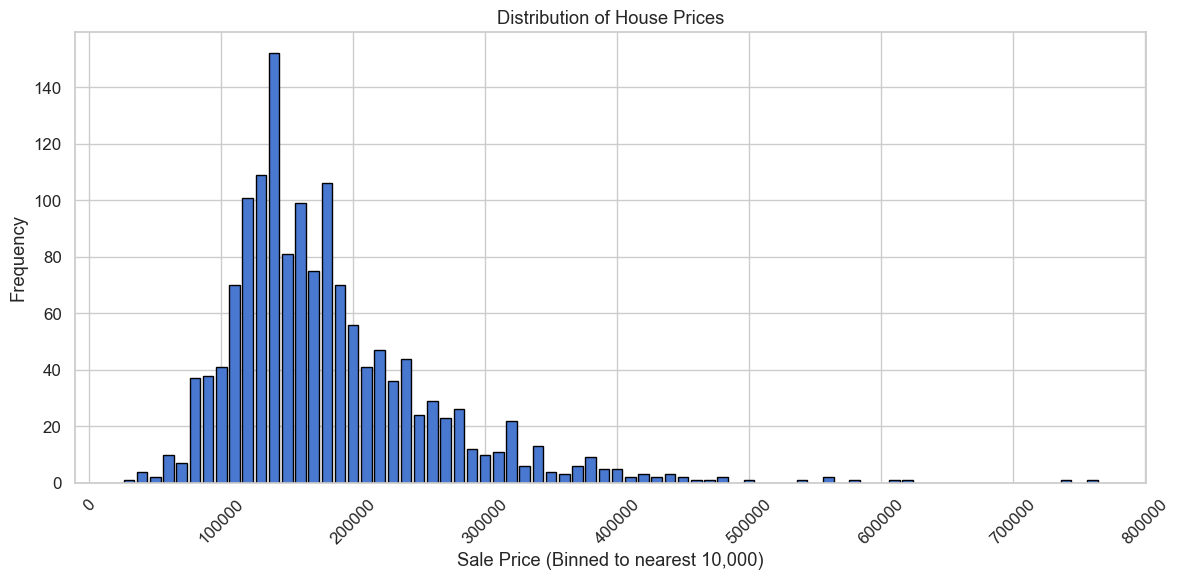

In [35]:
df['PriceBin'] = df['SalePrice'].round(-4)
hist = df.groupby('PriceBin').size().reset_index(name='frequency').sort_values('PriceBin')
plt.figure(figsize=(12, 6))
plt.bar(hist['PriceBin'], hist['frequency'], width=8000, align='center', edgecolor='black')
plt.xlabel('Sale Price (Binned to nearest 10,000)')
plt.ylabel('Frequency')
plt.title('Distribution of House Prices')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


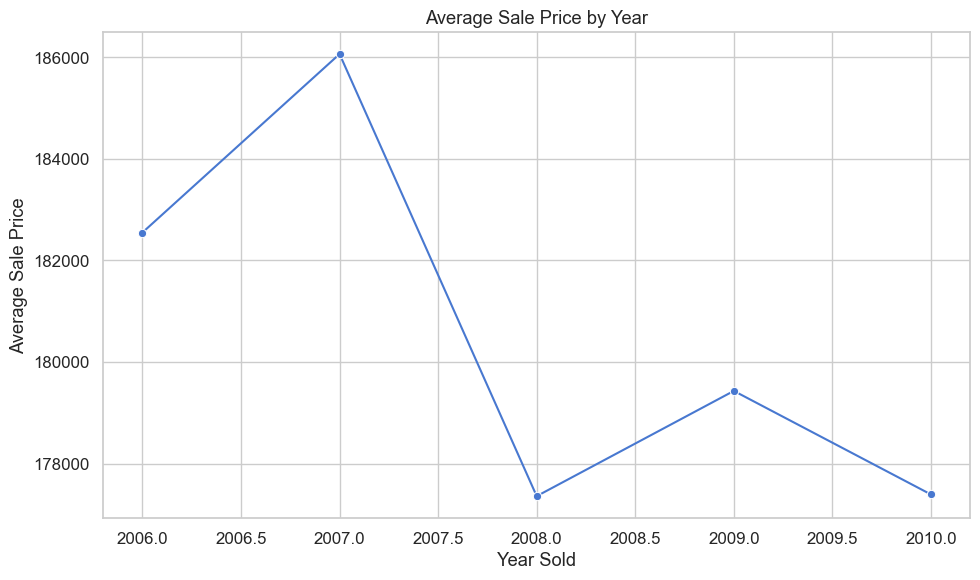

In [36]:
avg_price_by_year = df.groupby('YrSold')['SalePrice'].mean().reset_index(name='avg_price').sort_values('YrSold')
plt.figure(figsize=(10, 6))
sns.lineplot(data=avg_price_by_year, x='YrSold', y='avg_price', marker='o')
plt.title('Average Sale Price by Year')
plt.xlabel('Year Sold')
plt.ylabel('Average Sale Price')
plt.grid(True)
plt.tight_layout()
plt.show()

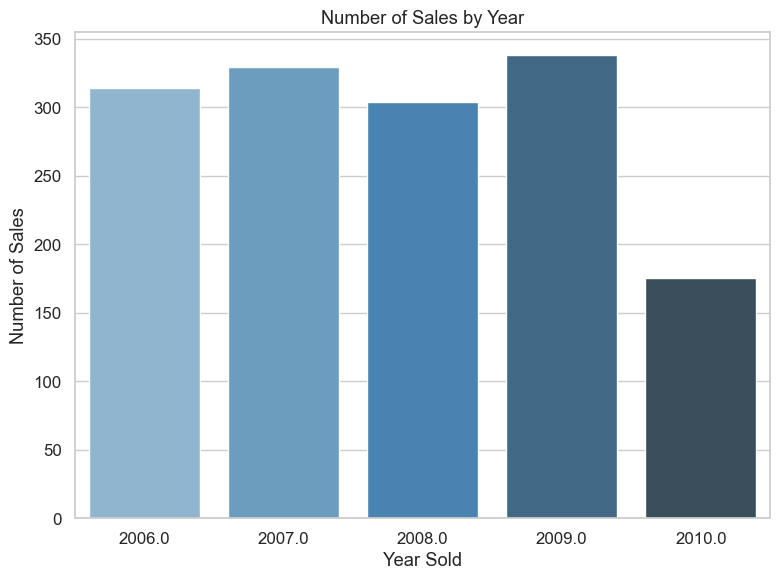

In [37]:
sales_count_by_year = df.groupby('YrSold').size().reset_index(name='num_sales')
plt.figure(figsize=(8,6))
sns.barplot(data=sales_count_by_year, x='YrSold', y='num_sales', palette='Blues_d')
plt.title('Number of Sales by Year')
plt.xlabel('Year Sold')
plt.ylabel('Number of Sales')
plt.tight_layout()
plt.show()

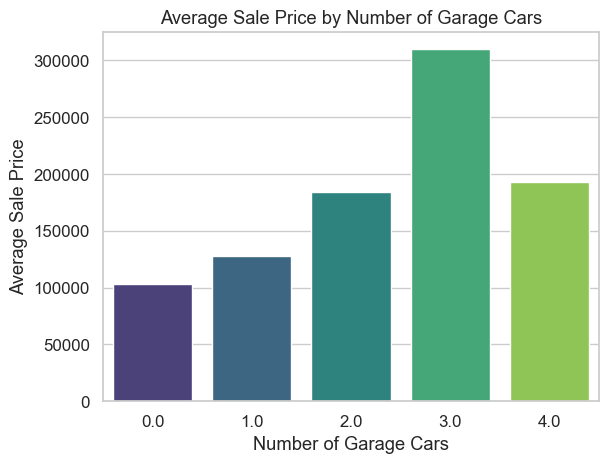

In [38]:
avg_price_by_garage = df.groupby('GarageCars')['SalePrice'].mean().reset_index(name='avg_price')

sns.barplot(data=avg_price_by_garage, x='GarageCars', y='avg_price', palette='viridis')
plt.title('Average Sale Price by Number of Garage Cars')
plt.xlabel('Number of Garage Cars')
plt.ylabel('Average Sale Price')
plt.xticks(rotation=0)
plt.show()

In [40]:
garage = df.groupby('GarageFinish').agg(
    ct = ('GarageFinish', 'size'),
    av = ('SalePrice', 'mean')
).reset_index()
garage

,GarageFinish,ct,av
0,Fin,352,240052.690341
1,RFn,422,202068.869668
2,Unf,686,137570.460641


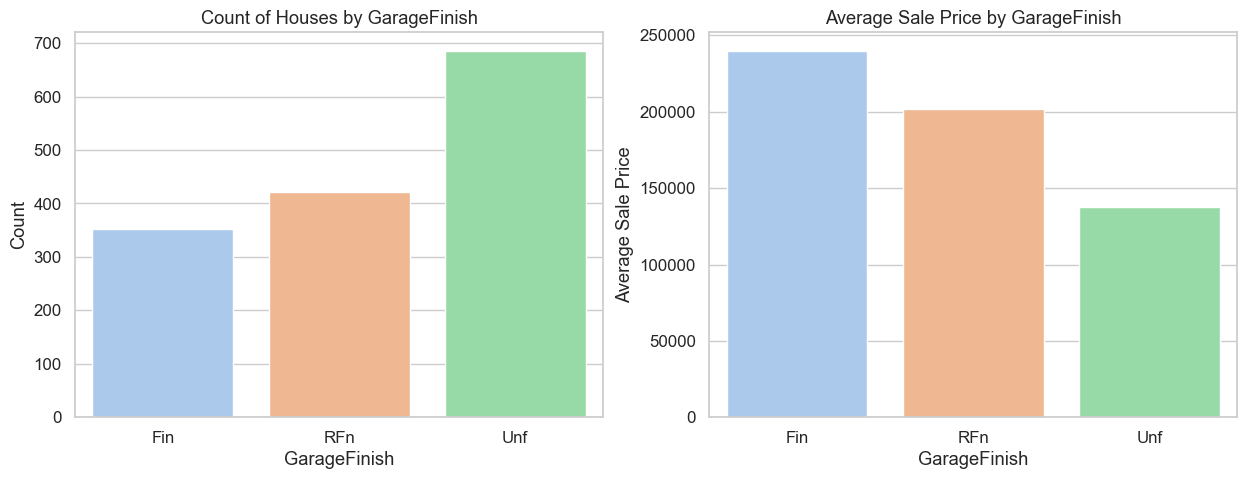

In [44]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
sns.barplot(data=garage, x='GarageFinish', y='ct', palette='pastel')
plt.title('Count of Houses by GarageFinish')
plt.xlabel('GarageFinish')
plt.ylabel('Count')

plt.subplot(1,2,2)
sns.barplot(data=garage, x='GarageFinish', y='av', palette='pastel')
plt.title('Average Sale Price by GarageFinish')
plt.xlabel('GarageFinish')
plt.ylabel('Average Sale Price')
plt.show()

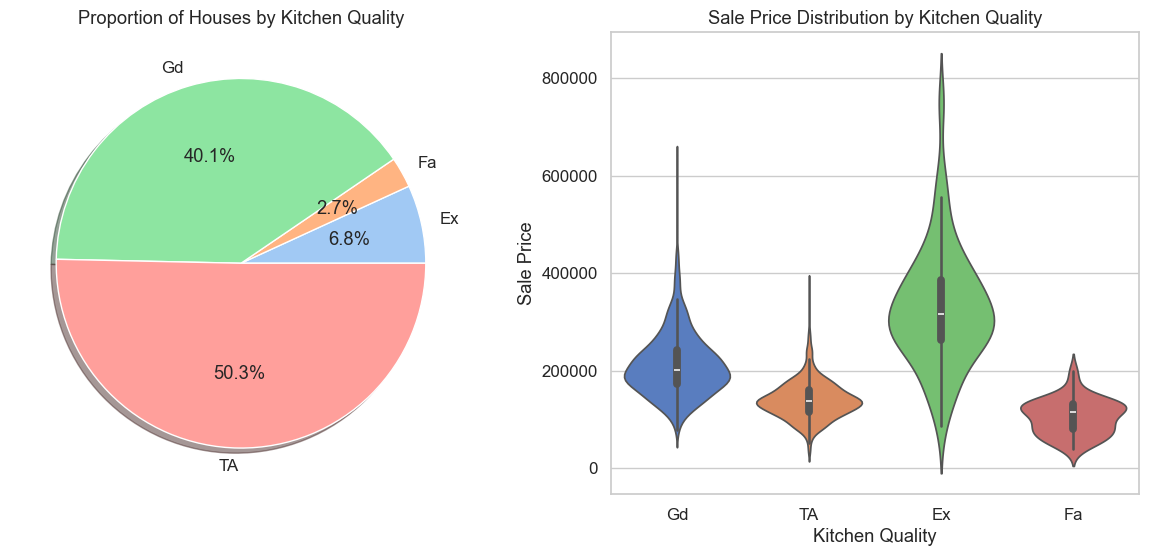

In [48]:
kitchen = df.groupby('KitchenQual').agg(
    ct = ('KitchenQual', 'size'),
    av = ('SalePrice', 'mean')
).reset_index()
plt.figure(figsize=(15,6))

plt.subplot(1,2,1)
plt.pie(kitchen['ct'], labels=kitchen['KitchenQual'], autopct='%1.1f%%', colors=sns.color_palette('pastel'),shadow=True)
plt.title('Proportion of Houses by Kitchen Quality')

plt.subplot(1,2,2)
sns.violinplot(data=df, x='KitchenQual', y='SalePrice', palette='muted')
plt.title('Sale Price Distribution by Kitchen Quality')
plt.xlabel('Kitchen Quality')
plt.ylabel('Sale Price')
plt.show()

In [62]:
top_10_expensive = df[['Id', 'SalePrice', 'Neighborhood', 'OverallQual','YearBuilt']] \
                    .sort_values(by='SalePrice', ascending=False).head(10)
cheapest_10 = df[['Id', 'SalePrice', 'Neighborhood', 'OverallQual','YearBuilt']] \
                    .sort_values(by='SalePrice', ascending=True).head(10)

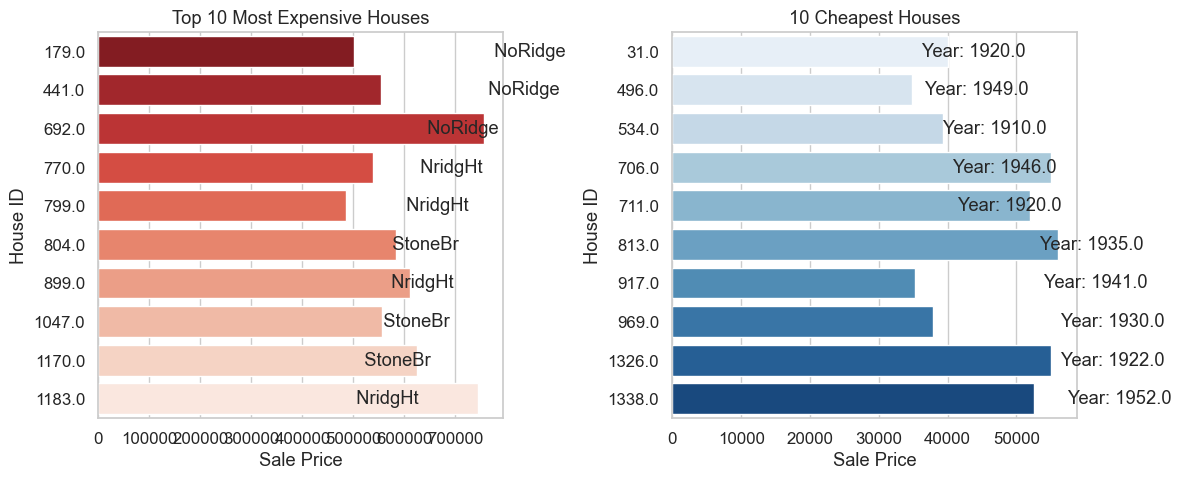

In [63]:
plt.figure(figsize=(12,5))
plt.subplot(1, 2, 1)
sns.barplot(data=top_10_expensive, y='Id', x='SalePrice', palette='Reds_r', orient='h')
plt.title('Top 10 Most Expensive Houses')
plt.xlabel('Sale Price')
plt.ylabel('House ID')
for i, (price, neigh) in enumerate(zip(top_10_expensive['SalePrice'], top_10_expensive['Neighborhood'])):
    plt.text(price, i, f'  {neigh}', va='center')

plt.subplot(1, 2, 2)
sns.barplot(data=cheapest_10, y='Id', x='SalePrice', palette='Blues', orient='h')
plt.title('10 Cheapest Houses')
plt.xlabel('Sale Price')
plt.ylabel('House ID')
for i, (price, year) in enumerate(zip(cheapest_10['SalePrice'], cheapest_10['YearBuilt'])):
    plt.text(price, i, f'  Year: {year}', va='center')

plt.tight_layout()
plt.show()

In [65]:
high_quality = df[(df['OverallQual'] >= 9) & (df['GrLivArea'] > 3000)]
high_quality_large_home = high_quality[['Id', 'OverallQual', 'GrLivArea', 'SalePrice']].sort_values(by='SalePrice', ascending=False)
high_quality_large_home.head(5)

,Id,OverallQual,GrLivArea,SalePrice
691,692.0,10.0,4316.0,755000.0
1182,1183.0,10.0,4476.0,745000.0
1169,1170.0,10.0,3627.0,625000.0
798,799.0,9.0,3140.0,485000.0
185,186.0,10.0,3608.0,475000.0


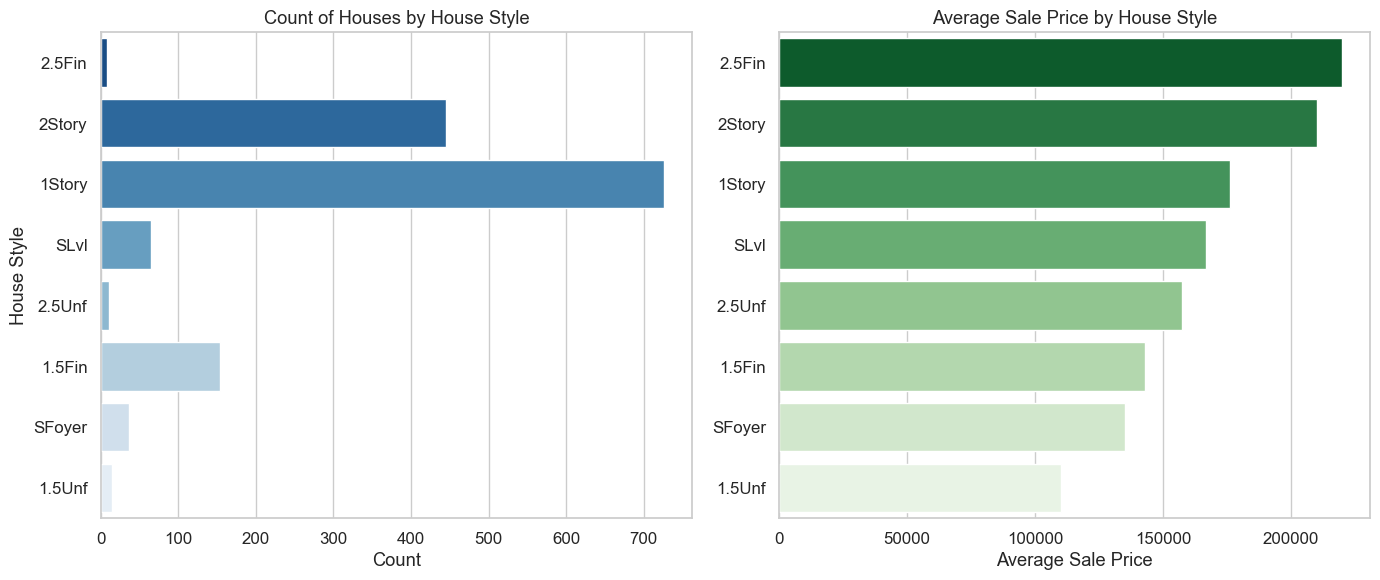

In [69]:
house_style_stats = df.groupby('HouseStyle').agg(
    ct = ('HouseStyle', 'size'),
    avg_saleprice = ('SalePrice', 'mean')
).reset_index().sort_values(by='avg_saleprice', ascending=False)
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
sns.barplot(data=house_style_stats, y='HouseStyle', x='ct',palette='Blues_r')
plt.title('Count of Houses by House Style')
plt.xlabel('Count')
plt.ylabel('House Style')

plt.subplot(1,2,2)
sns.barplot(data=house_style_stats,y='HouseStyle',x='avg_saleprice',palette='Greens_r')

plt.title('Average Sale Price by House Style')
plt.xlabel('Average Sale Price')
plt.ylabel('')
plt.tight_layout()
plt.show()

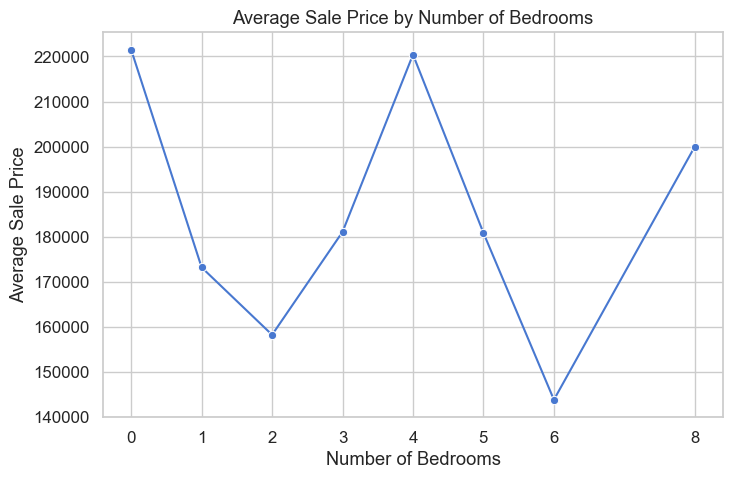

In [70]:
bedroom_avg_price = df.groupby('BedroomAbvGr')['SalePrice'].mean().reset_index(name='avg_saleprice')
plt.figure(figsize=(8,5))
sns.lineplot(data=bedroom_avg_price, x='BedroomAbvGr', y='avg_saleprice', marker='o')
plt.title('Average Sale Price by Number of Bedrooms')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Average Sale Price')
plt.xticks(bedroom_avg_price['BedroomAbvGr'])
plt.grid(True)
plt.show()

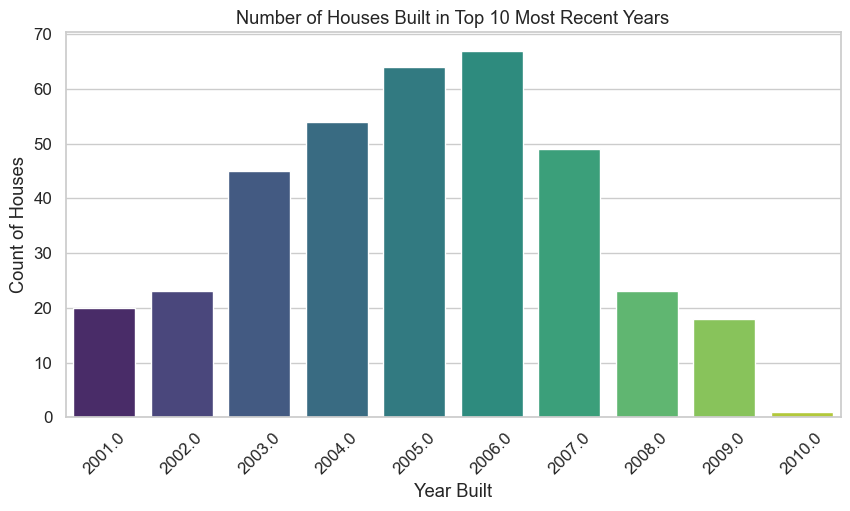

In [71]:
yearbuilt_counts = df.groupby('YearBuilt').size().reset_index(name='train_ct').sort_values(by='YearBuilt', ascending=False).head(10)

plt.figure(figsize=(10,5))
sns.barplot(data=yearbuilt_counts, x='YearBuilt', y='train_ct', palette='viridis')
plt.title('Number of Houses Built in Top 10 Most Recent Years')
plt.xlabel('Year Built')
plt.ylabel('Count of Houses')
plt.xticks(rotation=45)
plt.show()

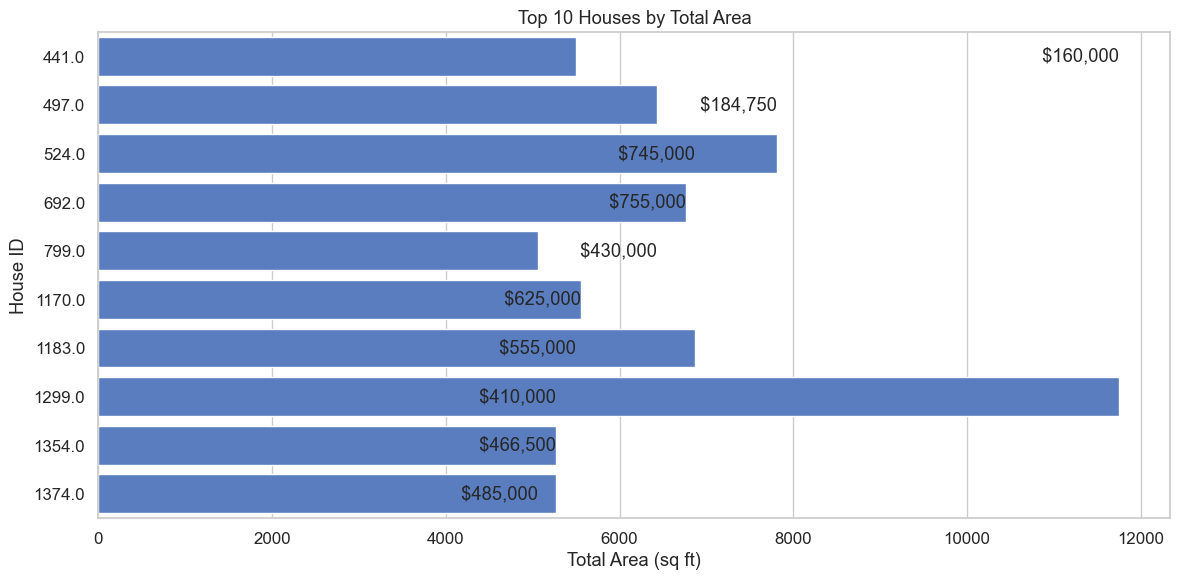

In [77]:
df['total_area'] = df['GrLivArea'] + df['TotalBsmtSF']
top_10_total_area = df[['Id', 'total_area', 'SalePrice']].sort_values(by='total_area', ascending=False).head(10)
plt.figure(figsize=(12,6))
sns.barplot(data=top_10_total_area,y='Id',x='total_area',orient='h')
plt.title('Top 10 Houses by Total Area')
plt.xlabel('Total Area (sq ft)')
plt.ylabel('House ID')
for i, (area, price) in enumerate(zip(top_10_total_area['total_area'], top_10_total_area['SalePrice'])):
    plt.text(area, i, f'  ${price:,.0f}', va='center', ha='right')
plt.tight_layout()
plt.show()

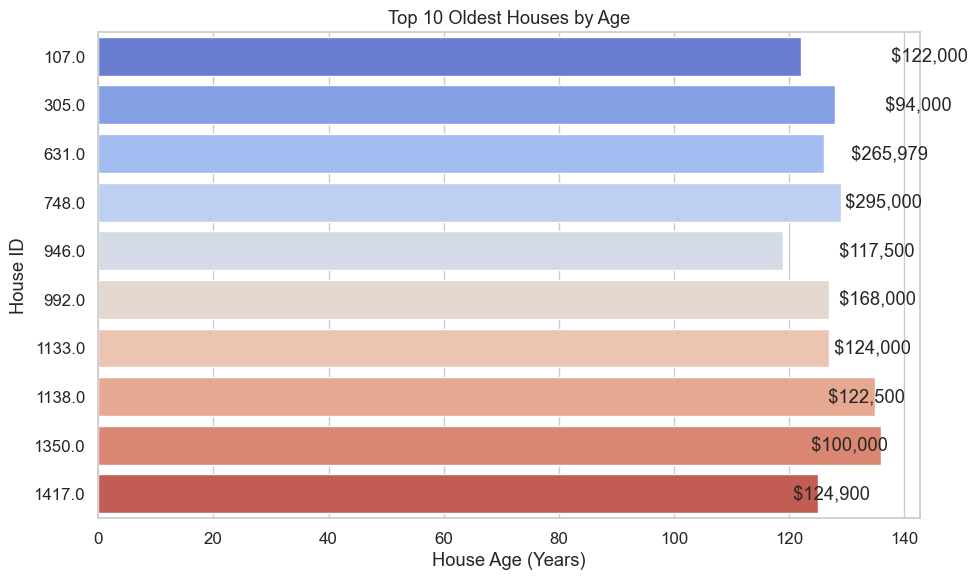

In [80]:
df['house_age'] = df['YrSold'] - df['YearBuilt']
oldest_houses = df[['Id', 'house_age', 'SalePrice']].sort_values(by='house_age', ascending=False).head(10)
plt.figure(figsize=(10,6))
sns.barplot(data=oldest_houses, y='Id', x='house_age', palette='coolwarm', orient='h')
plt.title('Top 10 Oldest Houses by Age')
plt.xlabel('House Age (Years)')
plt.ylabel('House ID')

for i, (age,price) in enumerate(zip(oldest_houses['house_age'], oldest_houses['SalePrice'])):
    plt.text(age, i, f'  ${price:,.0f}', va='center', ha='left')
plt.tight_layout()
plt.show()

In [81]:
top_qual_10 = df[df['OverallQual'] == 10][['Id','OverallQual','SalePrice']].sort_values(by='SalePrice',ascending=False).head(10)
top_qual_10

,Id,OverallQual,SalePrice
691,692.0,10.0,755000.0
1182,1183.0,10.0,745000.0
1169,1170.0,10.0,625000.0
440,441.0,10.0,555000.0
185,186.0,10.0,475000.0
1373,1374.0,10.0,466500.0
1243,1244.0,10.0,465000.0
591,592.0,10.0,451950.0
58,59.0,10.0,438780.0
389,390.0,10.0,426000.0


In [29]:
df.head(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1.0,60.0,RL,65.0,8450.0,Pave,Grvl,Reg,Lvl,AllPub,...,0.0,Gd,MnPrv,Shed,0.0,2.0,2008.0,WD,Normal,208500.0
1,2.0,20.0,RL,80.0,9600.0,Pave,Grvl,Reg,Lvl,AllPub,...,0.0,Gd,MnPrv,Shed,0.0,5.0,2007.0,WD,Normal,181500.0
2,3.0,60.0,RL,68.0,11250.0,Pave,Grvl,IR1,Lvl,AllPub,...,0.0,Gd,MnPrv,Shed,0.0,9.0,2008.0,WD,Normal,223500.0


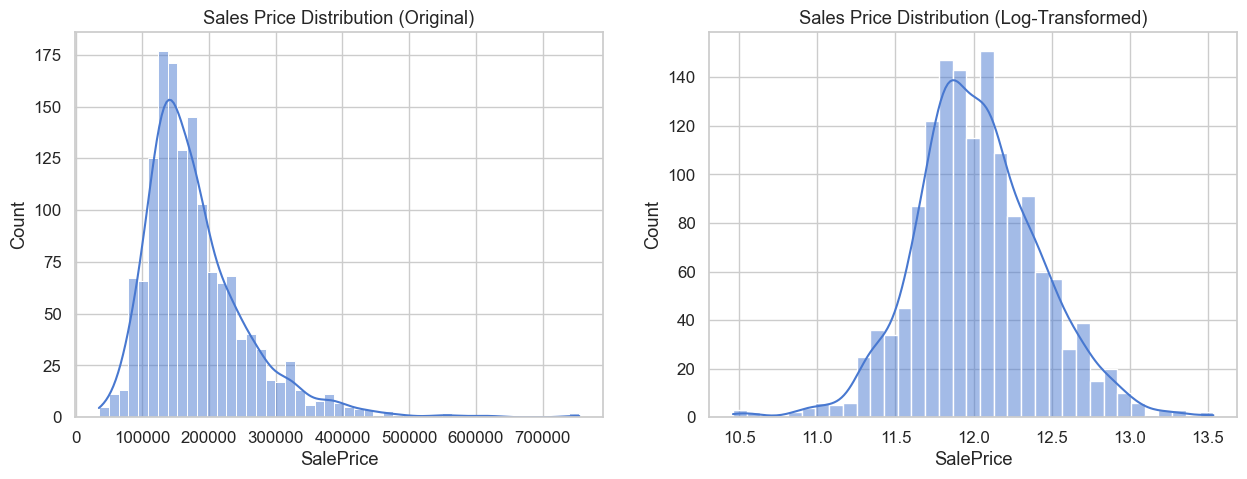

In [6]:
plt.figure(figsize=(15, 5))
plt.subplot(1,2,1)
sns.histplot(df['SalePrice'], kde=True)
plt.title('Sales Price Distribution (Original)')

plt.subplot(1,2,2)
sns.histplot(np.log1p(df['SalePrice']), kde=True)
plt.title('Sales Price Distribution (Log-Transformed)')
plt.show()

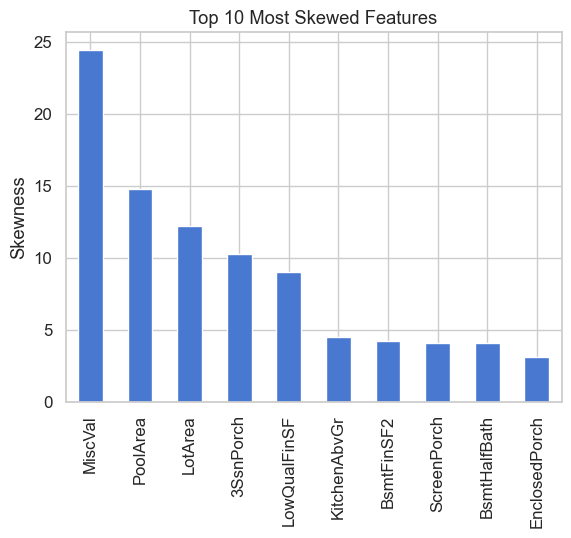

In [7]:
skew_vals = df.select_dtypes(include='number').skew().sort_values(ascending=False)
skew_vals[:10].plot(kind='bar', title='Top 10 Most Skewed Features')
plt.ylabel('Skewness')
plt.show()

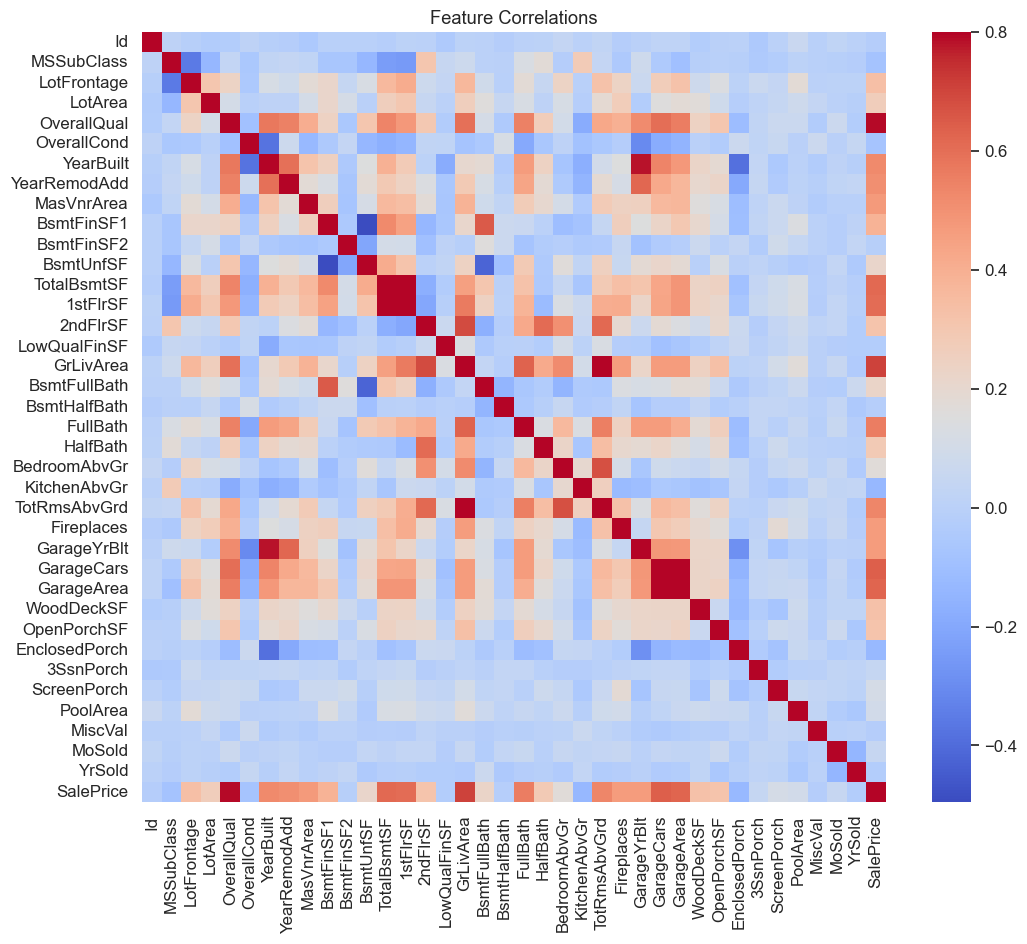

In [8]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(numeric_only=True), cmap='coolwarm', vmax=0.8)
plt.title('Feature Correlations')
plt.show()

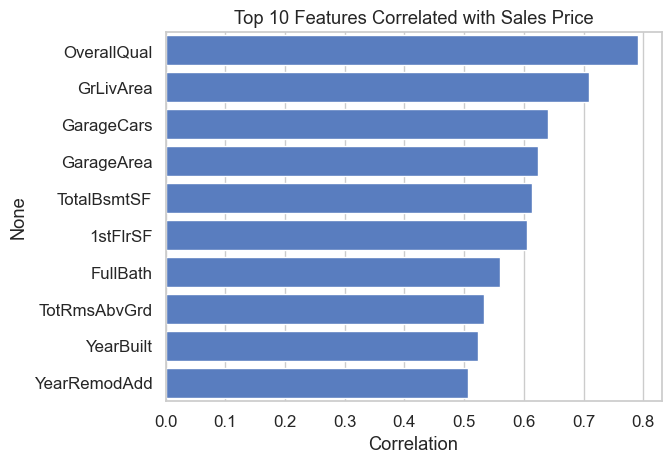

In [9]:
corr = df.corr(numeric_only=True)
top_corr = corr['SalePrice'].abs().sort_values(ascending=False)[1:11]
sns.barplot(x=top_corr.values, y=top_corr.index)
plt.title('Top 10 Features Correlated with Sales Price')
plt.xlabel('Correlation')
plt.show()

In [12]:
top_features = top_corr.index.tolist()
top_features

['OverallQual',
 'GrLivArea',
 'GarageCars',
 'GarageArea',
 'TotalBsmtSF',
 '1stFlrSF',
 'FullBath',
 'TotRmsAbvGrd',
 'YearBuilt',
 'YearRemodAdd']

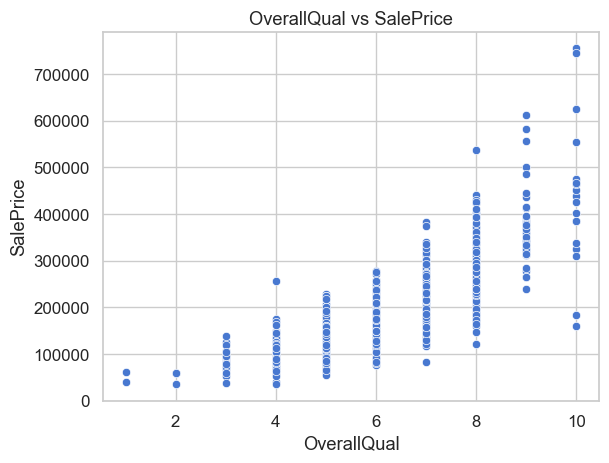

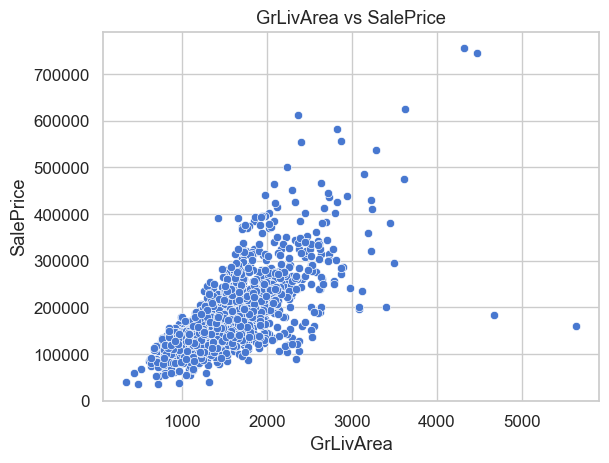

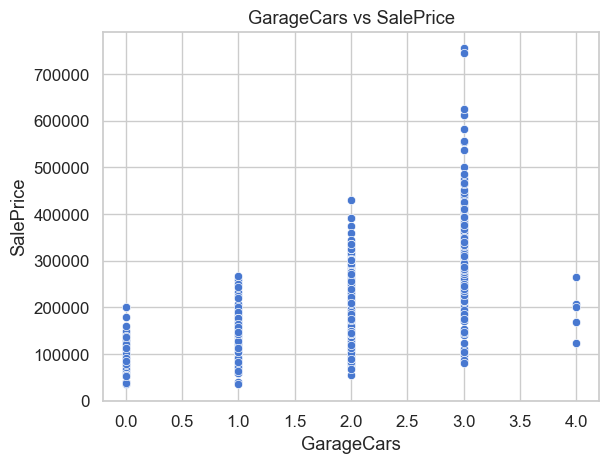

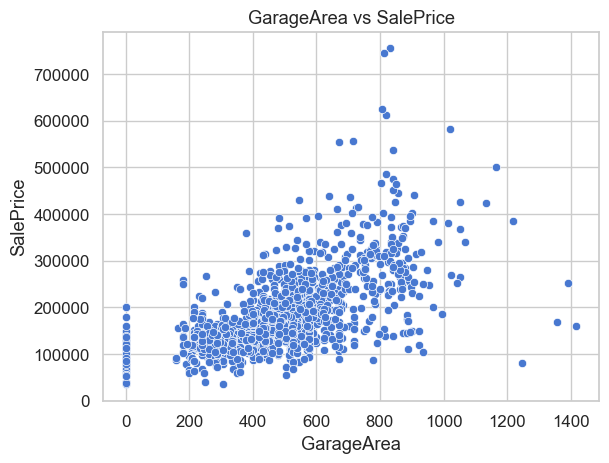

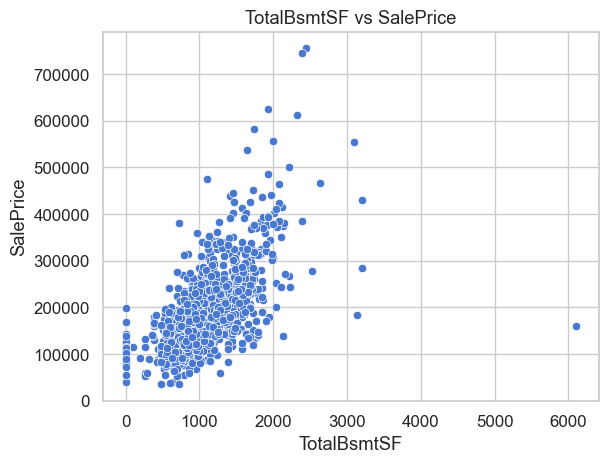

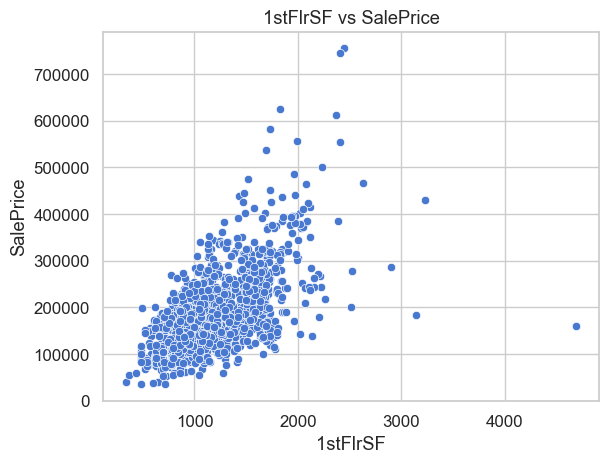

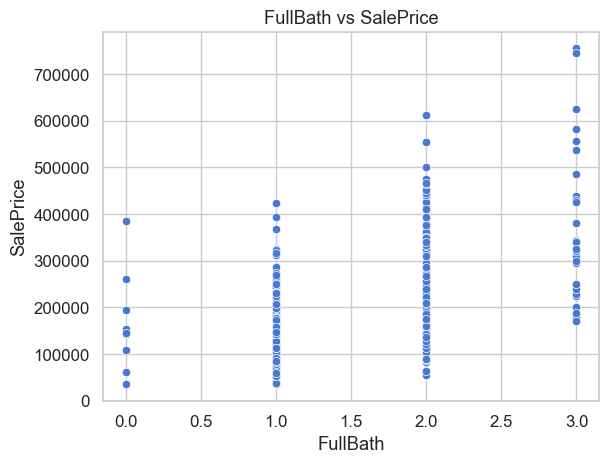

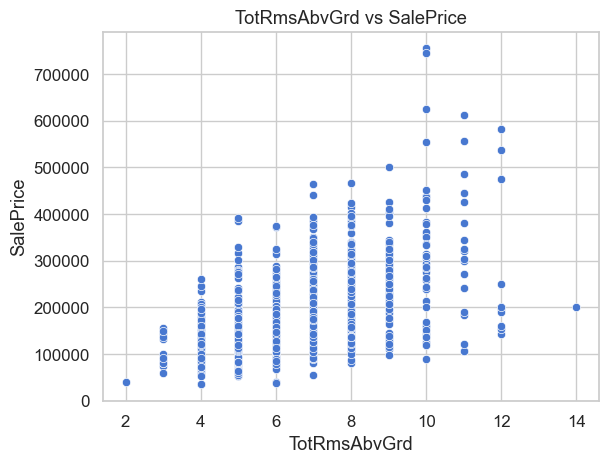

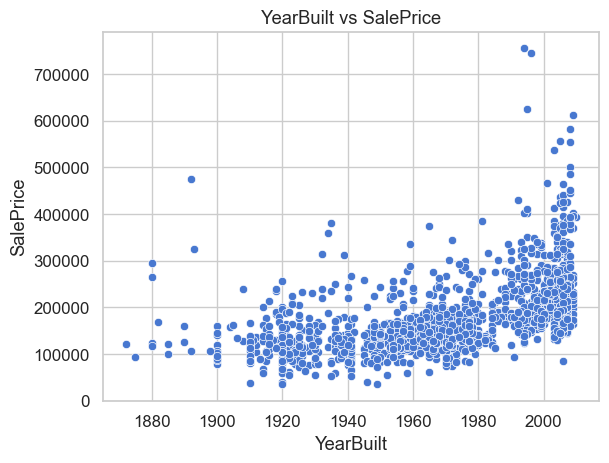

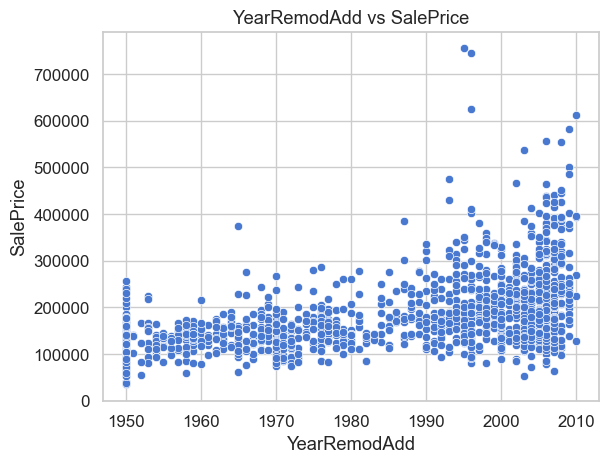

In [13]:
for i, col in enumerate(top_features):
    plt.figure()
    sns.scatterplot(data=df, x=col, y='SalePrice')
    plt.title(f'{col} vs SalePrice')
    plt.show()

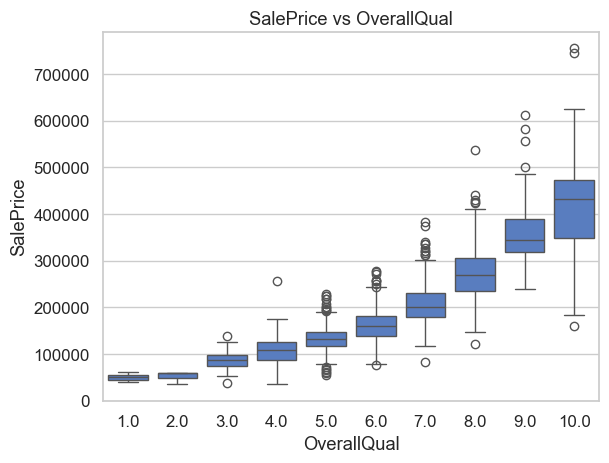

In [18]:
sns.boxplot(data=df, x='OverallQual', y ='SalePrice')
plt.title("SalePrice vs OverallQual")
plt.show()

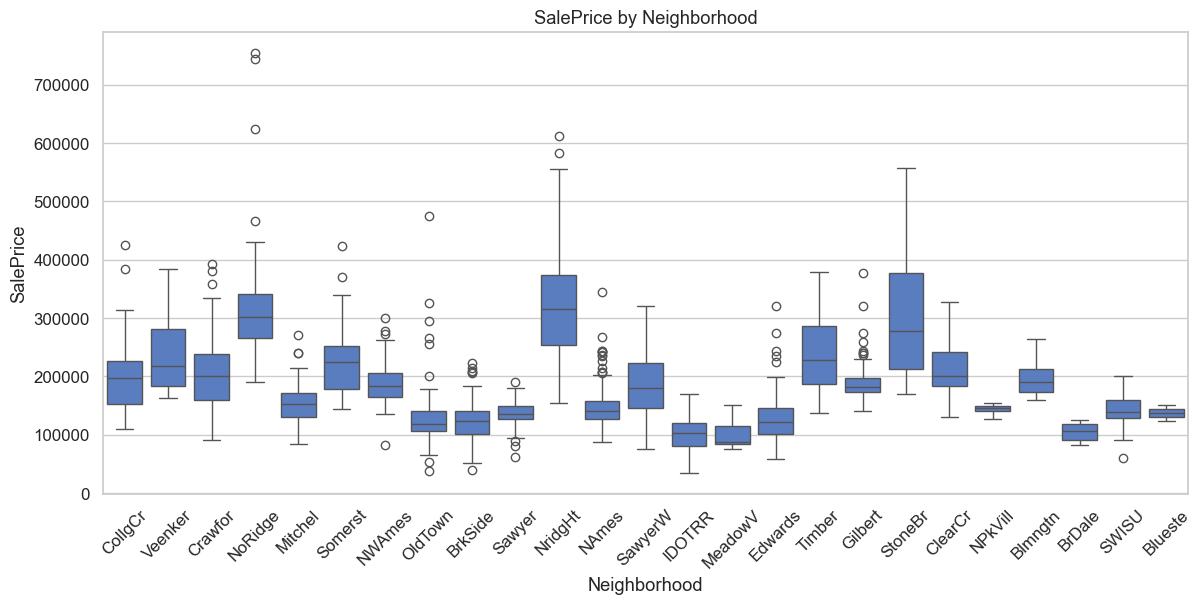

In [19]:
plt.figure(figsize=(14,6))
sns.boxplot(data=df, x='Neighborhood',y='SalePrice')
plt.xticks(rotation = 45)
plt.title('SalePrice by Neighborhood')
plt.show()

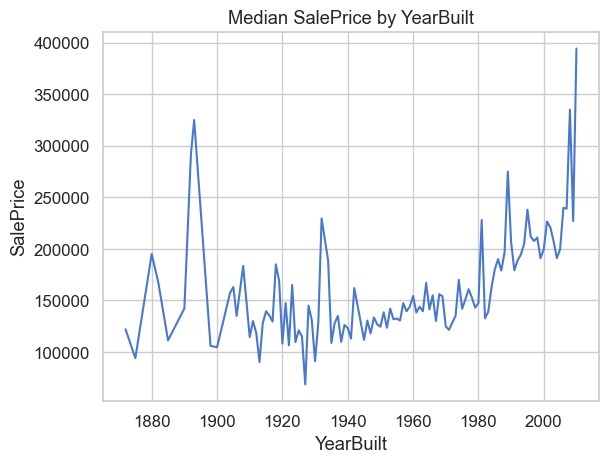

In [21]:
gb = df.groupby('YearBuilt')['SalePrice'].median().reset_index()
sns.lineplot(x='YearBuilt', y='SalePrice', data=gb)
plt.title("Median SalePrice by YearBuilt")
plt.show()

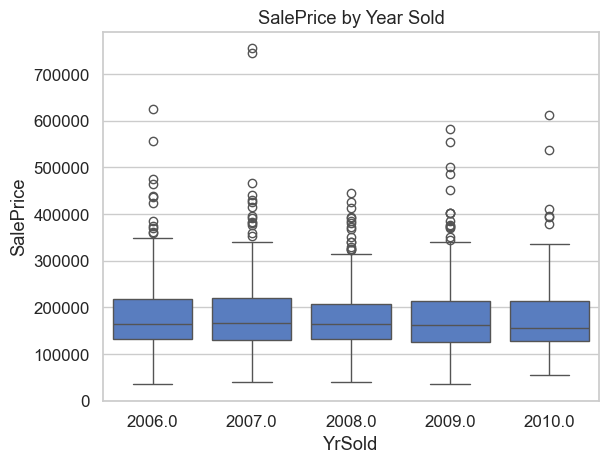

In [22]:
sns.boxplot(x='YrSold', y='SalePrice', data =df)
plt.title('SalePrice by Year Sold')
plt.show()

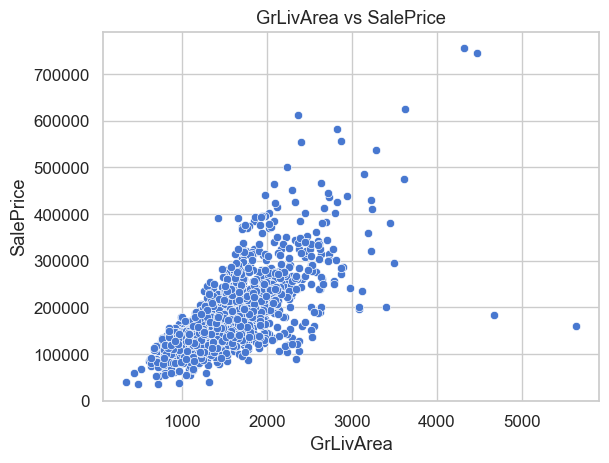

In [23]:
sns.scatterplot(data=df, x='GrLivArea', y='SalePrice')
plt.title("GrLivArea vs SalePrice")
plt.show()

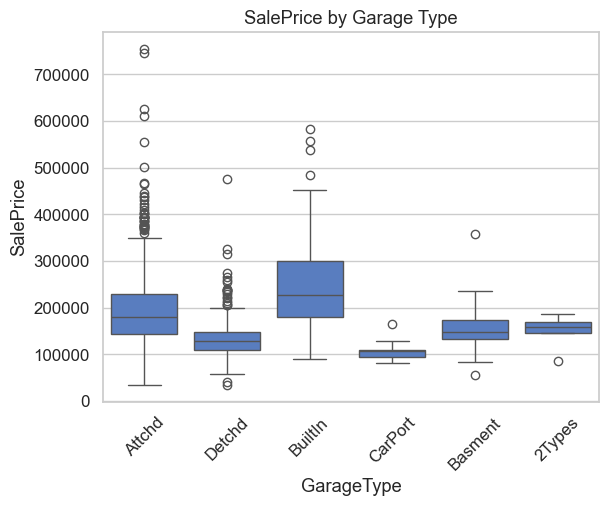

In [24]:
sns.boxplot(data=df, x='GarageType', y='SalePrice')
plt.xticks(rotation=45)
plt.title("SalePrice by Garage Type")
plt.show()

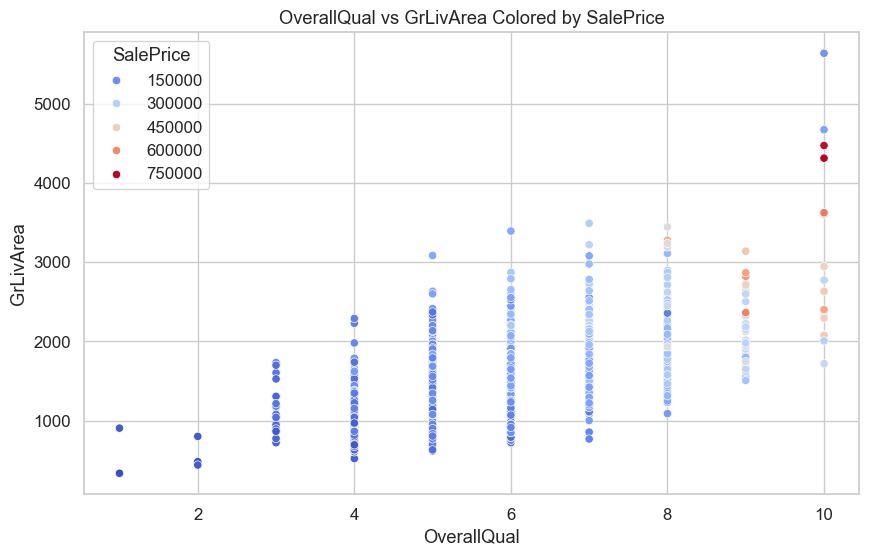

In [25]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='OverallQual', y='GrLivArea', hue='SalePrice', palette='coolwarm')
plt.title("OverallQual vs GrLivArea Colored by SalePrice")
plt.show()

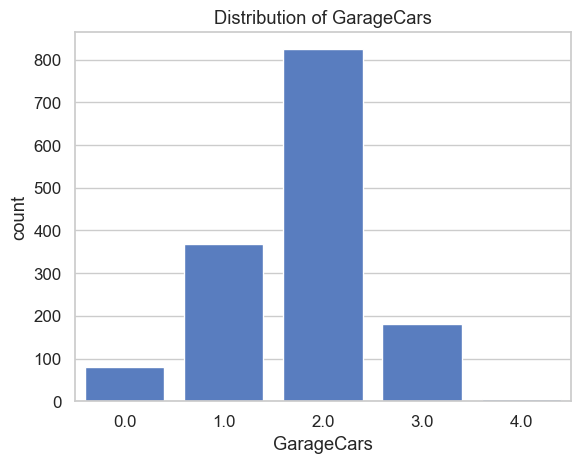

In [26]:
sns.countplot(x='GarageCars', data=df)
plt.title("Distribution of GarageCars")
plt.show()


In [14]:
df.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1.0,60.0,RL,65.0,8450.0,Pave,Grvl,Reg,Lvl,AllPub,...,0.0,Gd,MnPrv,Shed,0.0,2.0,2008.0,WD,Normal,208500.0
1,2.0,20.0,RL,80.0,9600.0,Pave,Grvl,Reg,Lvl,AllPub,...,0.0,Gd,MnPrv,Shed,0.0,5.0,2007.0,WD,Normal,181500.0
2,3.0,60.0,RL,68.0,11250.0,Pave,Grvl,IR1,Lvl,AllPub,...,0.0,Gd,MnPrv,Shed,0.0,9.0,2008.0,WD,Normal,223500.0
3,4.0,70.0,RL,60.0,9550.0,Pave,Grvl,IR1,Lvl,AllPub,...,0.0,Gd,MnPrv,Shed,0.0,2.0,2006.0,WD,Abnorml,140000.0
4,5.0,60.0,RL,84.0,14260.0,Pave,Grvl,IR1,Lvl,AllPub,...,0.0,Gd,MnPrv,Shed,0.0,12.0,2008.0,WD,Normal,250000.0


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', Ridge())
])


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.linear_model import Lasso

models = {
    'Ridge': Ridge(),
    'Lasso': Lasso(),
    'RandomForest': RandomForestRegressor(),
    'XGBoost': XGBRegressor(),
    'LightGBM': LGBMRegressor()
}

for name, model in models.items():
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('model', model)
    ])
    scores = cross_val_score(pipeline, train_X, train_y, cv=5, scoring='neg_root_mean_squared_error')
    print(f"{name}: {-scores.mean():.4f}")


In [ ]:
import optuna
from sklearn.model_selection import cross_val_score

def objective(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 1000),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
        'subsample': trial.suggest_float('subsample', 0.5, 1.0),
    }

    model = XGBRegressor(**params)
    score = cross_val_score(model, train_X, train_y, cv=5, scoring='neg_root_mean_squared_error').mean()
    return -score

study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=50)
best_params = study.best_params
print("Best params:", best_params)


In [ ]:
final_model = XGBRegressor(**best_params)
final_model.fit(train_X, train_y)

from sklearn.metrics import mean_squared_error

preds = final_model.predict(train_X)
rmse = mean_squared_error(train_y, preds, squared=False)
print(f"Final RMSE on train set: {rmse}")


In [ ]:
final_preds = final_model.predict(test_X)
final_preds = np.expm1(final_preds)  # Reverse log1p

submission = pd.DataFrame({
    'Id': test_df['Id'],
    'SalePrice': final_preds
})
submission.to_csv('submission.csv', index=False)


In [ ]:
import shap

explainer = shap.Explainer(final_model)
shap_values = explainer(train_X)

shap.summary_plot(shap_values, train_X)
